<a href="https://colab.research.google.com/github/LadonV/Data-Viz/blob/main/Exam_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Ladon Vance

##CPSMA 4313

In [76]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

In [77]:
df = pd.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/refs/heads/master/CuratedDataSets/2022WorldCupPlayers.csv')

df.head()

display(df.nationality)

,nationality
0,Australia
1,Wales
2,Morocco
3,Qatar
4,Morocco
...,...
675,Argentina
676,Ecuador
677,Brazil
678,Costa Rica


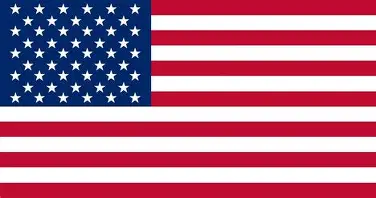

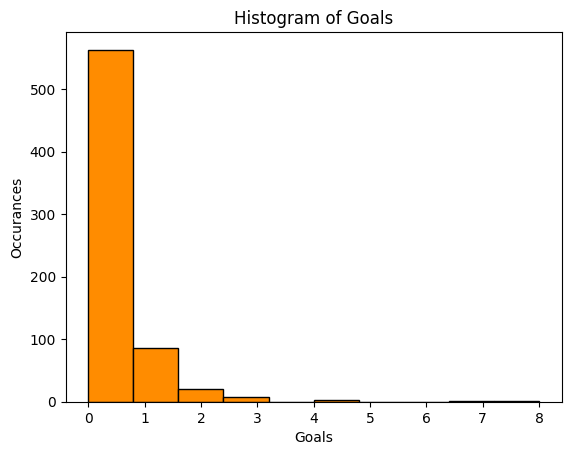

In [78]:
df['goals'].plot.hist(edgecolor='black', color='darkorange')
plt.title('Histogram of Goals')
plt.xlabel('Goals')
plt.ylabel('Occurances')
plt.show()

#Hist Code
This code was created by me not using an LLM to assist me. The code is set to take the column goals from the dataframe then plot a histogram. I set the edge of the histogram to black to give it a border and set the color to orange to represent ECU as this histogram doesn't represent any specific nation or club.
Then I titled the histogram and names the x and y axis.

#Hist Analysis
This histogram tells us that most of the players have zero goals in the time period of the dataset. There are a few players that have scored up to 8 goals causing the histogram to go from zero to 8. It is shown that the number of players that'vs scored zero goals is above 500 assuming to be around 600. The next closest would be players that've scored 1 which is around 100 players. This histogram is good for showing the array of the number of players that have scored the different number of goals over the timeframs of the dataset.

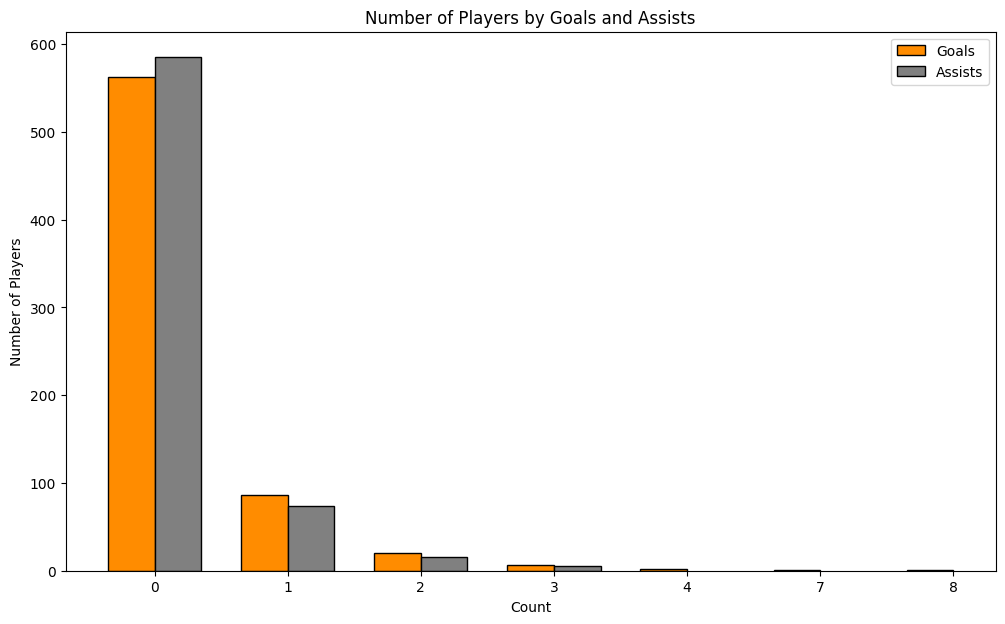

In [79]:
goals_counts = df['goals'].value_counts().sort_index()
assists_counts = df['assists'].value_counts().sort_index()

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Goals': goals_counts,
    'Assists': assists_counts
})

# Define index for grouping
ind = np.arange(len(plot_df))

fig, ax = plt.subplots(figsize=(12, 7))

# Plotting the bars
ax.bar(ind - bar_width/2, plot_df['Goals'], bar_width, label='Goals', color='darkorange', edgecolor='black')
ax.bar(ind + bar_width/2, plot_df['Assists'], bar_width, label='Assists', color='grey', edgecolor='black')

ax.set_title('Number of Players by Goals and Assists')
ax.set_xlabel('Count')
ax.set_ylabel('Number of Players')
ax.set_xticks(ind)
ax.set_xticklabels(plot_df.index)
ax.legend(loc='upper right')
plt.show()

#Hist Code
I used Gemini the LLM to help create this histogram as I didn't fully know how the best way to put two variables on the same axis. I used the prompt "create a histogram with goals and assists on the same axis" this gave me an overlapping graph and so I messed around with the colors and couldn't get it to look good. I then gave it the prompt "can you have them next to each other instead of on top" this created two separate graphs next to each other which wasn't what I was looking for. Finally I gave it the prompt "can you have them on the same graph but the 0 goals and 0 assists being next to each other and each corresponding number" this gave me what I was looking for. Then I took out the grid because I'm not a fan of the grid, I also took out the tight layout as I didn't see a difference. More code was taken out after seeing with and without and liking without more. To describe the code goal_counts and assist_counts were created to count the number of goals and assists from the dataset and store them. plot_df was used to store the dataframe of goal_counts and assist_counts. This was then used to create the bars for goals and assists. Labels and ticks were added to make the histogram nicer. The color was also changed to represent some of the ECU jerseys.

#Hist Analysis
This histogram shows the breakdown of number of goals and assists by players in the FIFA World Cup 2022. It is shown that most players ended with zero goals or assists between 500-600 players for both. The data tails off a lot after that and very few players had more than 1 goal or assist. This histogram also shows that goals and assists are closely related across all the number of goals or assists.

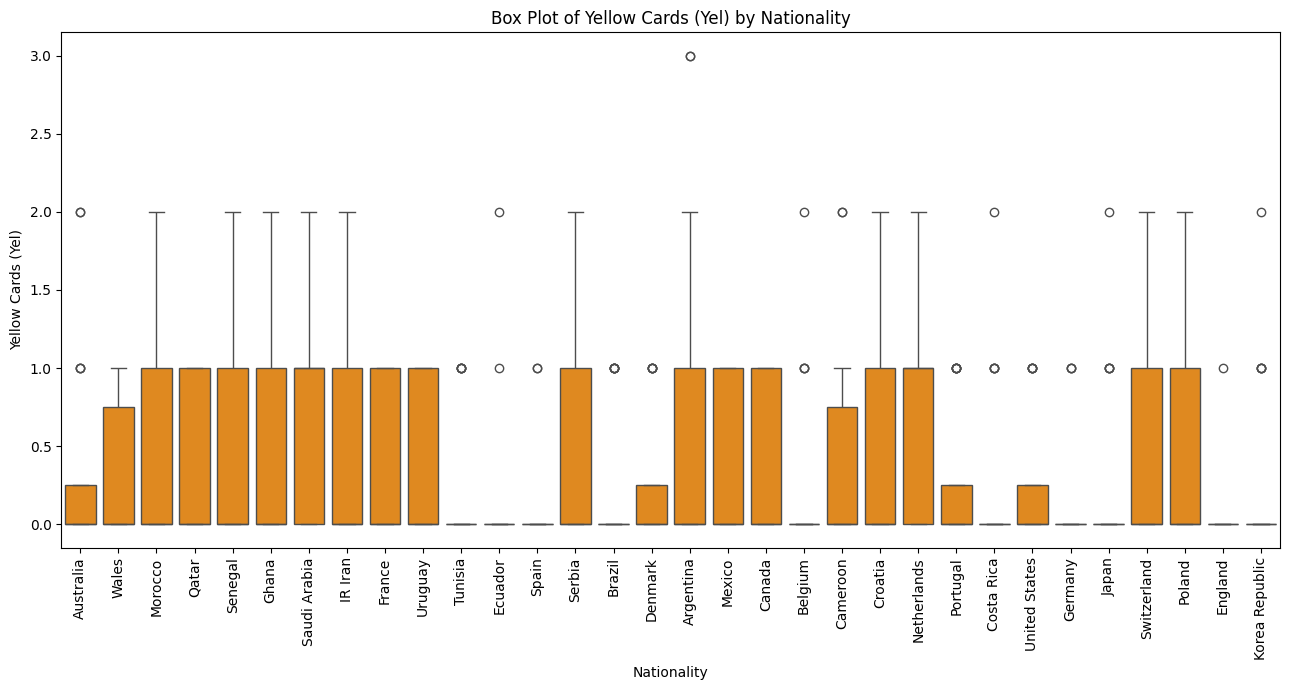

In [80]:
plt.figure(figsize=(13, 7))
sns.boxplot(x='nationality', y='Yel', data=df, color='darkorange')
plt.title('Box Plot of Yellow Cards (Yel) by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Yellow Cards (Yel)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#Box Code
This box plot was created by Gemini with the prompt "create a box plot for 'Yel' by nationality". The code creates a box plot to the size 13 by 7, it was adjusted from 15 by 7. Then it creates the boxplot using nationality on the x axis and number of yellow cards on the y axis using data from the dataset. Then a title is given for the entire boxplot and the x and y axis. Finally to make the nationality labels look good on the x axis they needed to be rotated 90 degrees, the tight layout makes the plot look nicer. The color was added to keep the color from the previous graphs.

#Box Analysis
This box plot shows the number of yellow cards recieved in the 2022 FIFA World Cup by nationality. I do not believe that a box plot fits these variables best. This is due to how the box plot works the box is the median then 50% of the data followed by lines of 25% above and below which excludes outliers. These variables don't work as there arent enough data points/yellow cards to create a proper box plot for most nationalities. To analyze the plot only one nationality has a player with more than 2 yellow cards which was Argentina. Many nationalities outliers are only the players with a yellow card as most of their players didn't recieve a yellow card. The nationalities with a visiable box had more players recieve a yellow card so the 50% wasn't just at zero.

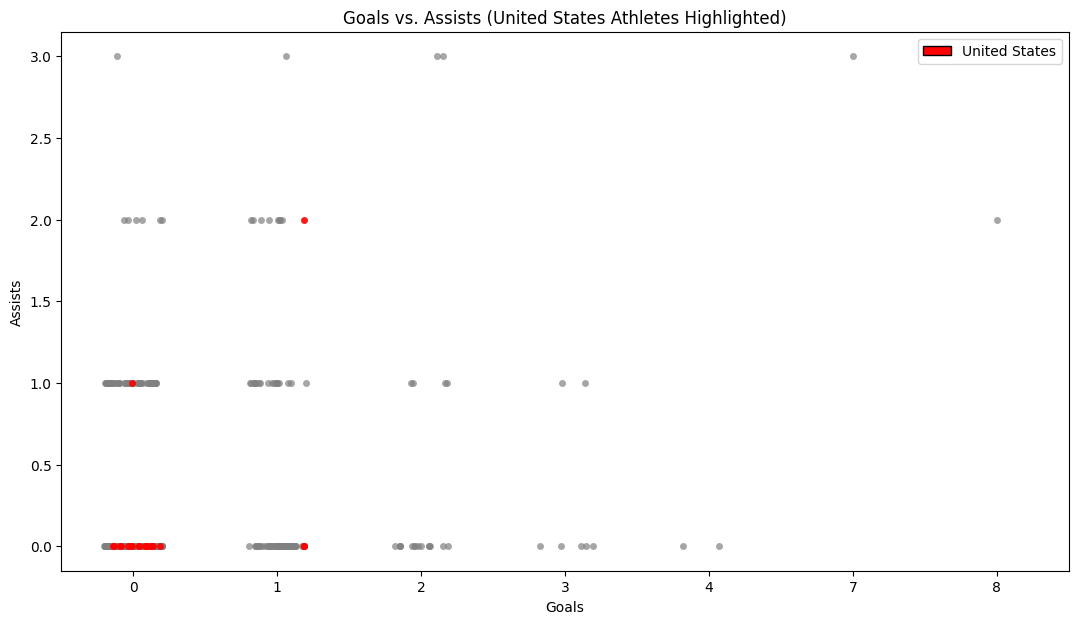

In [81]:
plt.figure(figsize=(13,7))

# Separate data for USA and non-USA players
df_usa = df[df['nationality'] == 'United States']
df_other = df[df['nationality'] != 'United States']

# Plot non-USA players first without a label for the legend
sns.stripplot(data=df_other, x='goals', y='assists', jitter=0.2, alpha=0.7, color='grey')

# Overlay USA players with a distinct color
sns.stripplot(data=df_usa, x='goals', y='assists', jitter=0.2, alpha=0.9, color='red')

plt.title('Goals vs. Assists (United States Athletes Highlighted)')
plt.xlabel('Goals')
plt.ylabel('Assists')

# Create a custom legend for 'United States'
legend_elements = [Patch(facecolor='red', edgecolor='black', label='United States')]
plt.legend(handles=legend_elements)

plt.show()

#Scatter Code
Most of the origional code was created myself I changed the plot figure size to 13 by 7 then created the scatterplot using goals and assists for x and y axis. Then I gave it a title and labeled the x and y axis. Once it was ran it looked horrible only showing a few points so I used Gemini with the prompt "can you add jitter to this scatterplot" this added jitter to the scatterplot so all points could be seen. Then I wanted to add color to the United States players so highlight them so I used Gemini with the prompt "can you change the color only for the nationality United States" that worked but the legend didn't look very good so I used the LLM again with the prompt "Can you change the legend just to the color of the United States not including the other nations" this gave me two United States in the legend so finally I had to ask it "can you make it so there is only 1 united states in the legend" this added matplotlib.patches in order to adjust the legend to how I wanted it. I the separate the United States I separated the United States and non United States then created two separate scatterplots on the same graph with separate colors. The United States color was change to red to represent the country flag. The others are grey to show they arent the United States.

#Scatter Analysis
From the scatterplot it shows that most players fall under zero goals and assists, 1 goal no assists, or no goals 1 assists. This also shows that about less than 5 United States players had a goal or assist. There isn't much correlation between goals and assists as the players with more goals do not have near as many assists. The player with 7 goals and 3 assists is the most impresive to me as they were able to tie the most assists while only having 1 less goal than the leader.

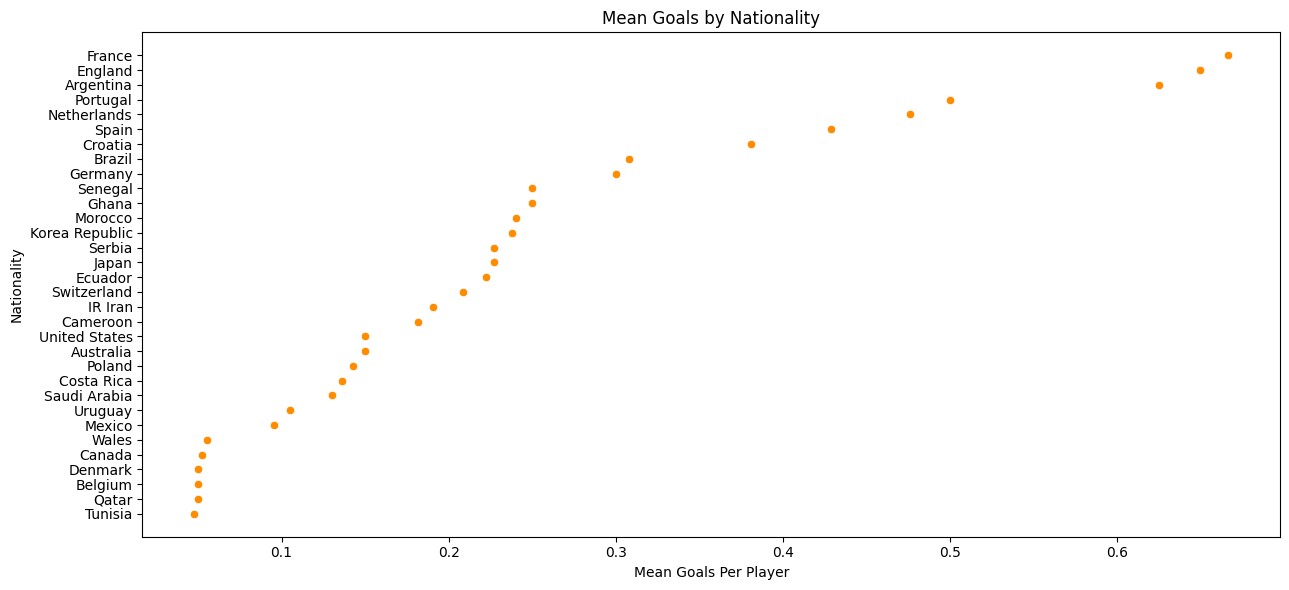

In [82]:
plt.figure(figsize=(13,6))

# Prepare the data
mean_goals_by_nationality = df.groupby('nationality')['goals'].mean().reset_index()
mean_goals_by_nationality = mean_goals_by_nationality.sort_values(by='goals', ascending=False)

# Create the scatter plot using seaborn
sns.scatterplot(data=mean_goals_by_nationality, x='goals', y='nationality', color='darkorange')

plt.title('Mean Goals by Nationality')
plt.xlabel('Mean Goals Per Player')
plt.ylabel('Nationality')
plt.tight_layout() # Adjust layout to prevent labels from overlapping or being cut off
plt.show()

#Dot Plot Code
This idea was given using the Data Pre-Processing and Visualization textbook. I found it interesting and wanted to use nationalities and mean goals scored by players of the nationality. I originally coppied the code from the book and adjusted it to what I wanted but the nationality labels were overlapping a little so I asked Gemini "can you spread out the labels on the y axis" which didn't do anything so I asked "this didn't work is there any better way" this caused the graph to become huge so I shrank the figure size but now the graph was decending from smallest to largest. Finally I asked Gemini "can you keep the figure size the same but have the graph with greatest down the smallest" This finally gave me what I was looking for. The dataset was grouped by nationality and found the mean goals for each nationality. Then the nationalities were sorted by mean with assending false to make it go from largest to smallest. Then created a scatterplot using the new variable with goals on the x axis and nationality on the y axis. Finally the plot was given a title and labels for the x and y axis. The tight layout keeps the labels from overlapping.

#Dot Plot Analysis
This plot shows us that 3 countries have quite a larger mean number of goals per player of their nationality. With only 4 nationalities having higher than a 0.5 goals per player. There are 7 countries that have fewer than 1 goal scored per player in their nationality. This shows us that those countries didn't have many goals scored in total throuout the 2022 FIFA World Cup. France leads in the largest mean goals scored per player while Tunisa has the lowest.

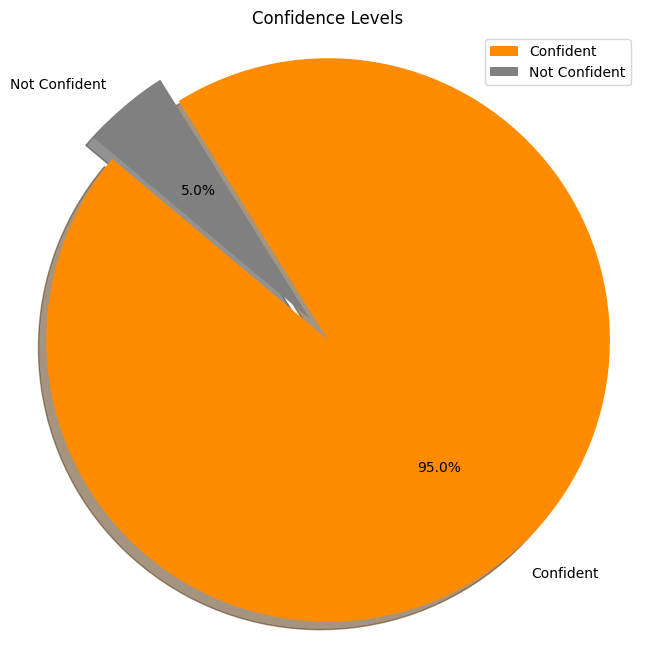

In [83]:
labels = ['Confident', 'Not Confident']
sizes = [95, 5]
colors = ['darkorange', 'grey'] # You can choose your own colors
explode = (0.1, 0)  # 'explode' the first slice (Confident)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Confidence Levels')
plt.legend(labels, loc='best')
plt.show()

#Confidence Visualization
I used Gemini to create a pie chart with 95% confidence in getting an A, I told it "create a pie chart that shows 95% with the label confident in the legend and then 5% with the label not confident in the legend" I found it to be an interesting way to show my confidence. Started with the labels confident and not confident, then gave it proper sizes, next added colors to match ECU, and it was exploded to make it pop out making it look cooler. The figure was given a size, titles, labels, and a legend to make it all go together and create a good graphic.

#Graphic Excellence
I believe this graph does not display graphical excellence as the scale is very inconsistent. The scale from 0" to 5'0" is the same as a single inch from 5'0" to 5'7". This causes the average height of an Indian female to look minuature compared to the other countries represented. There is also only 3 colors present for the 6 countries and doesn't flow in the same way, just feel like it gives it a weird look. The height difference is the main problem 5'5" look like giants compared to 5'0" dispite there only being a 5" differnce.

#Time Worked On
I worked on this exam for 3 hours 40 minutes. Probably too long but I enjoyed created visualizations and explaining them.

#Hardest and Easiest
The hardest topic was the scatterplot with highlighting the specific nationality. This was due to needed a jitter to show overlapping points then needed to figure out how to create a different color for a specific variable.
The easiest topic was the histogram of goals, it was very simple and I didn't need the use of a LLM to help me create it.

#Unclear Vis
The visualization I was most unclear on was the boxplot, this was mostly for the way it was used in this exam. The variables didn't seem to work very well which caused it to be very hard to interperate.

#Statement
I attest that the resources above were the only ones utilized in completing the exam and the work included is my own and no one else from this course.